## Homework week5 Lab
### Richard birdguy

# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("fraudTest.csv",index_col=0)

In [5]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
print("shape of data: ",df.shape)

shape of data:  (555719, 22)


In [18]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]].copy()

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]
print("dependent variable: ",y.value_counts(), "\n","independent variable: ",X.columns)

dependent variable:  0    553574
1      2145
Name: is_fraud, dtype: int64 
 independent variable:  Index(['amt', 'city_pop', 'time_var', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel'],
      dtype='object')


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [22]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [24]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [25]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [26]:
from sklearn.linear_model import LogisticRegression

In [46]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

   over_log_score  under_log_score  smote_log_score
0        0.928933         0.929785         0.927158


<BarContainer object of 3 artists>

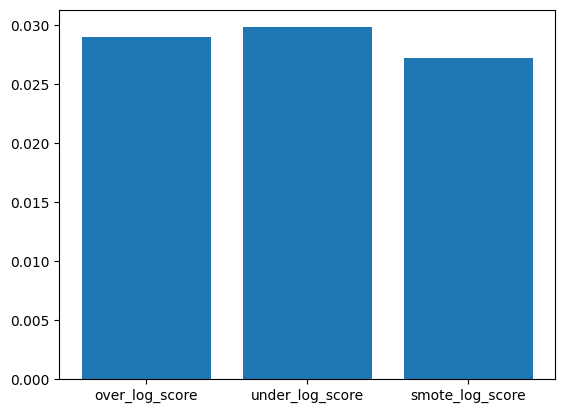

In [47]:
over_log_score = over_log.score(X_test, y_test)
under_log_score = under_log.score(X_test, y_test)
smote_log_score = smote_log.score(X_test, y_test)
print(pd.DataFrame({"over_log_score": over_log_score, "under_log_score": under_log_score, "smote_log_score": smote_log_score}, index = [0]))
from matplotlib import pyplot as plt
plt.bar(["over_log_score", "under_log_score", "smote_log_score"], np.array([over_log_score, under_log_score, smote_log_score])-0.9)
plt.show()

In [16]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

###  UNDERSAMPLING GROUP performs with the highest accuracy

# 5.) Which performed best in Out of Sample metrics?

In [17]:
# Sensitivity here in credit fraud is more important as seen from last class

In [40]:
from sklearn.metrics import confusion_matrix

In [38]:
y_true = y_test

In [ ]:
y_pred = over_log.predict(X_test)
over_log_cm = confusion_matrix(y_true, y_pred)
over_log_cm

array([[77201,  5836],
       [   88,   233]])

In [54]:
over_log_sen = over_log_cm[1,1] / (over_log_cm[1,0] + over_log_cm[1,1])
print("Over Sample Sensitivity : ", over_log_sen)


Over Sample Sensitivity :  0.7258566978193146


In [55]:
y_pred = under_log.predict(X_test)
under_log_cm = confusion_matrix(y_true, y_pred)
under_log_cm

array([[77274,  5763],
       [   90,   231]])

In [56]:
under_log_sen = under_log_cm[1,1] / (under_log_cm[1,0] + under_log_cm[1,1])
print("Under Sample Sensitivity : ", under_log_sen)

Under Sample Sensitivity :  0.719626168224299


In [51]:
y_pred = smote_log.predict(X_test)
smote_log_cm = confusion_matrix(y_true, y_pred)
smote_log_cm

array([[77053,  5984],
       [   88,   233]])

In [59]:
smote_log_sen = smote_log_cm[1,1] / (smote_log_cm[1,0] + smote_log_cm[1,1])
print("SMOTE Sample Sensitivity : ", smote_log_sen)

SMOTE Sample Sensitivity :  0.7258566978193146


In [74]:
print("confusion matrix of over, under and smote:")
print(pd.DataFrame({"over_log_cm": over_log_cm.ravel(), "under_log_cm": under_log_cm.ravel(), "smote_log_cm": smote_log_cm.ravel()}).T)
print("\n Sensitivity and Accuracy of over, under and smote:")
print(pd.DataFrame(data = [[over_log_sen, over_log_score],[under_log_sen, under_log_score],[smote_log_sen, smote_log_score]],index=['over_log','under_log','smote_log'],columns=['sensitivity','accuracy']))




confusion matrix of over, under and smote:
                  0     1   2    3
over_log_cm   77201  5836  88  233
under_log_cm  77274  5763  90  231
smote_log_cm  77053  5984  88  233

 Sensitivity and Accuracy of over, under and smote:
           sensitivity  accuracy
over_log      0.725857  0.928933
under_log     0.719626  0.929785
smote_log     0.725857  0.927158


#### oversampling performs with the highest sensitivity and the second highest accuracy so I consider it as the one with the best performance

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [81]:
X_train_df = pd.DataFrame(X_train,columns=X.columns)
y_train_df = pd.DataFrame(y_train,columns=["is_fraud"])

In [82]:


# Convert X_train to a pandas DataFrame if it's not already one
#X_train = pd.DataFrame(X_train)


# Now concatenate them along the columns
raw_temp = pd.concat([X_train_df, y_train_df], axis=1)


In [27]:
X_train

array([[ 0.10292336, -0.28203027, -0.02816031, ..., -0.28496773,
        -0.31425703, -0.17989987],
       [-0.39728528, -0.29052596, -0.72217865, ..., -0.28496773,
         3.1821086 , -0.17989987],
       [-0.01157541, -0.28091172, -0.31733462, ..., -0.28496773,
        -0.31425703, -0.17989987],
       ...,
       [-0.38772274,  0.01484616, -0.02816031, ..., -0.28496773,
         3.1821086 , -0.17989987],
       [-0.42370807, -0.29295283,  0.49235346, ..., -0.28496773,
        -0.31425703, -0.17989987],
       [-0.40691072, -0.29309597, -0.08599517, ..., -0.28496773,
         3.1821086 , -0.17989987]])

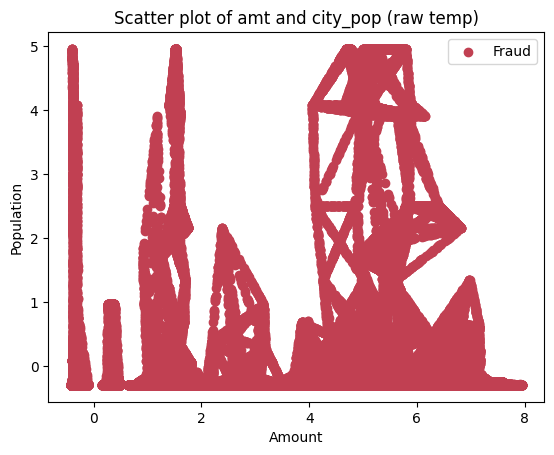

In [113]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])
#selected two variables to plot
#---------------------------
selected_vars = ["amt", "city_pop"]
#---------------------------
plt.scatter(raw_temp[raw_temp["is_fraud"] == 1][selected_vars[0]], raw_temp[raw_temp["is_fraud"] == 1][selected_vars[1]], c = "#c14052")
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")
plt.title("Scatter plot of {} and {} (raw temp)".format(selected_vars[0], selected_vars[1]))
plt.show()

In [89]:
smote_X_df = pd.DataFrame(smote_X,columns=X.columns)
smote_y_df = pd.DataFrame(smote_y,columns=["is_fraud"])
raw_temp = pd.concat([smote_X_df, smote_y_df], axis =1)

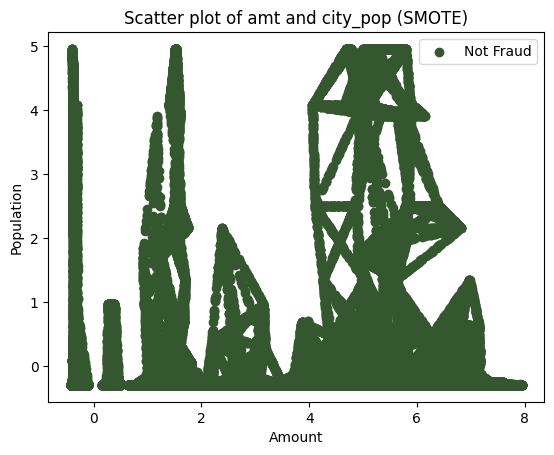

In [112]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1][selected_vars[0]], raw_temp[raw_temp["is_fraud"] == 1][selected_vars[1]], c = "#355730")
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")
plt.title("Scatter plot of {} and {} (SMOTE)".format(selected_vars[0], selected_vars[1]))
plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. 

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [96]:
resampling_method ={
    'over': RandomOverSampler(),
    'under':RandomUnderSampler(),
    'smote':SMOTE()
}
model_configs={
    'LOG':LogisticRegression(),
    'LASSO':LogisticRegression(penalty = 'l1',
                              C= 2., solver ='liblinear'),
    "DTREE": DecisionTreeClassifier()
}

In [97]:
def calc_perfmetric(y_true, y_pred):
    tn,fp,fn,tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity=tp/(tp+fn) 
    specificity= tn/(tn+fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return(sensitivity, specificity, precision, recall, f1)

In [98]:
trained_models = {}
results =[]

In [99]:
for resample_key, resampler in resampling_method.items():
    resample_X, resample_y = resampler.fit_resample(X_train,y_train)
   
    for model_key, model in model_configs.items():
        conbined_key = f'{resample_key}_{model_key}'
        
        m = model.fit(resample_X, resample_y)
        
        trained_models[conbined_key] = m
        
        y_pred = m.predict(X_test)
       
        sensitivity,specificity,precision,recall,f1 = calc_perfmetric(y_true, y_pred)
        
        results.append({'Model': conbined_key,
                       "Sensitivity": sensitivity,
                       'specificity':specificity,
                       'precision':precision,
                       'recall':recall,
                       'f1':f1})
        
        

In [110]:
results_df = pd.DataFrame(results)

In [111]:
#split the model name into two columns
results_df[['resample','model']] = results_df['Model'].str.split('_', expand=True)

#reset a dual index for dataframe
results_df.set_index(['resample','model'], inplace=True)
results_df.drop('Model', axis=1, inplace=True)
results_df

Sensitivity  specificity  precision    recall        f1
resample model                                                         
over     LOG       0.725857     0.929128   0.038084  0.725857  0.072371
         LASSO     0.725857     0.929128   0.038084  0.725857  0.072371
         DTREE     0.532710     0.998434   0.568106  0.532710  0.549839
under    LOG       0.722741     0.931657   0.039275  0.722741  0.074502
         LASSO     0.722741     0.931633   0.039262  0.722741  0.074478
         DTREE     0.915888     0.951793   0.068420  0.915888  0.127328
smote    LOG       0.725857     0.926960   0.036996  0.725857  0.070403
         LASSO     0.725857     0.927020   0.037025  0.725857  0.070457
         DTREE     0.713396     0.993124   0.286250  0.713396  0.408564

Text(0.5, 1.0, 'Performance Metrics')

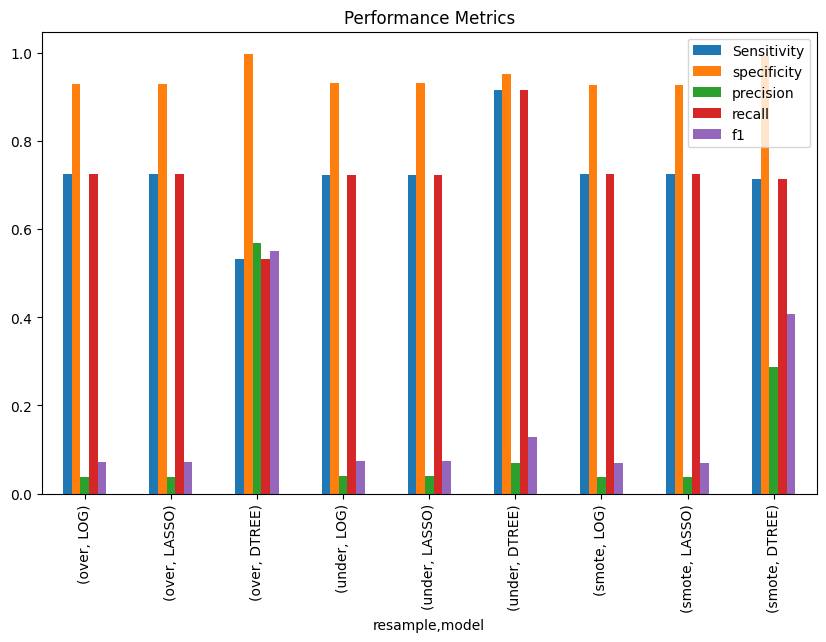

In [116]:
results_df_final = results_df
results_df_final.plot(kind='bar', figsize=(10,6))
plt.title('Performance Metrics')

#### Based on the result and plot above, the combination of decision tree algorithms and undersampling is the best mode with considerably higher level of sensitivity than others and a specficity rate at an accepted level. All the models applied decision tree outstrip LASSO and logistic regression on specificity but the one using undersampling has higher recall leve. In conclusion, the model converging decision tree algorithms with undersampling is the selected one.